In [40]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.spatial import distance

#getting  a dataset from google drive link 
url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
url2021 = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
#transferring a dataset to a new data frame
df21 = pd.read_csv(url2021)
#Dropping unimportant columns and rows of nan
data21 = df21.drop(['country_region_code','country_region','sub_region_2','metro_area','iso_3166_2_code','census_fips_code','place_id','date'],axis=1)
data21 = data21.dropna()
#This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
data21.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 57826 entries, 278 to 157378
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   sub_region_1                                        57826 non-null  object 
 1   retail_and_recreation_percent_change_from_baseline  57826 non-null  float64
 2   grocery_and_pharmacy_percent_change_from_baseline   57826 non-null  float64
 3   parks_percent_change_from_baseline                  57826 non-null  float64
 4   transit_stations_percent_change_from_baseline       57826 non-null  float64
 5   workplaces_percent_change_from_baseline             57826 non-null  float64
 6   residential_percent_change_from_baseline            57826 non-null  float64
dtypes: float64(6), object(1)
memory usage: 3.5+ MB


In [41]:
# to create training dataset 
groubedData21 = data21.groupby('sub_region_1').mean()
groubedData21

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
sub_region_1,,,,,,
Adana,-15.846566,20.793042,17.942016,-20.719001,-19.449599,4.841213
Adıyaman,-1.536765,27.797794,18.308824,-28.341912,-20.117647,7.389706
Afyonkarahisar,-11.647482,36.521583,77.607914,8.742806,-19.000000,3.417266
Aksaray,13.205036,34.564748,13.381295,-34.316547,-12.879496,2.589928
Amasya,-23.125725,24.127660,8.075435,-7.949710,-26.023211,6.181818
...,...,...,...,...,...,...
Çankırı,-35.725490,22.333333,17.127451,-37.892157,-30.279412,9.176471
Çorum,-8.372302,24.341727,7.678058,-15.492806,-25.059353,4.122302
İstanbul,-27.334692,20.385900,27.284478,1.656259,-22.844785,7.338670


In [42]:
Y_train= groubedData21.index
X_train= groubedData21

In [16]:
X_train

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
sub_region_1,,,,,,
Adana,-15.846566,20.793042,17.942016,-20.719001,-19.449599,4.841213
Adıyaman,-1.536765,27.797794,18.308824,-28.341912,-20.117647,7.389706
Afyonkarahisar,-11.647482,36.521583,77.607914,8.742806,-19.000000,3.417266
Aksaray,13.205036,34.564748,13.381295,-34.316547,-12.879496,2.589928
Amasya,-23.125725,24.127660,8.075435,-7.949710,-26.023211,6.181818
...,...,...,...,...,...,...
Çankırı,-35.725490,22.333333,17.127451,-37.892157,-30.279412,9.176471
Çorum,-8.372302,24.341727,7.678058,-15.492806,-25.059353,4.122302
İstanbul,-27.334692,20.385900,27.284478,1.656259,-22.844785,7.338670


In [17]:
Y_train

Index(['Adana', 'Adıyaman', 'Afyonkarahisar', 'Aksaray', 'Amasya', 'Ankara',
       'Antalya', 'Aydın', 'Balıkesir', 'Bartın', 'Batman', 'Bilecik',
       'Bingöl', 'Bolu', 'Burdur', 'Bursa', 'Denizli', 'Diyarbakır', 'Düzce',
       'Edirne', 'Elazığ', 'Erzincan', 'Erzurum', 'Eskişehir', 'Gaziantep',
       'Giresun', 'Hatay', 'Isparta', 'Kahramanmaraş', 'Kars', 'Kastamonu',
       'Kayseri', 'Kocaeli', 'Konya', 'Kütahya', 'Kırklareli', 'Kırıkkale',
       'Kırşehir', 'Malatya', 'Manisa', 'Mardin', 'Mersin', 'Muğla', 'Muş',
       'Nevşehir', 'Niğde', 'Ordu', 'Osmaniye', 'Rize', 'Sakarya', 'Samsun',
       'Sinop', 'Sivas', 'Tekirdağ', 'Tokat', 'Trabzon', 'Uşak', 'Van',
       'Yalova', 'Yozgat', 'Zonguldak', 'Çanakkale', 'Çankırı', 'Çorum',
       'İstanbul', 'İzmir', 'Şanlıurfa'],
      dtype='object', name='sub_region_1')

In [43]:
# taking samples from main dataset
sample = data21.groupby('sub_region_1').sample(n=1000, replace=True).groupby('sub_region_1').mean()
sample

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
sub_region_1,,,,,,
Adana,-15.785,21.515,18.384,-20.151,-19.465,4.601
Adıyaman,-2.124,27.220,17.248,-28.999,-19.854,7.488
Afyonkarahisar,-13.434,34.074,74.206,6.802,-19.723,3.770
Aksaray,13.515,34.755,13.797,-34.531,-13.550,2.791
Amasya,-23.919,23.619,6.888,-9.308,-26.329,6.297
...,...,...,...,...,...,...
Çankırı,-36.388,21.843,16.874,-37.564,-30.565,9.343
Çorum,-8.587,24.011,6.285,-16.731,-24.991,4.232
İstanbul,-27.824,20.852,28.160,1.265,-23.313,7.426


In [44]:
#making test data by using sample data frame
testData = pd.DataFrame(sample, columns=sample.columns)
testData

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
sub_region_1,,,,,,
Adana,-15.785,21.515,18.384,-20.151,-19.465,4.601
Adıyaman,-2.124,27.220,17.248,-28.999,-19.854,7.488
Afyonkarahisar,-13.434,34.074,74.206,6.802,-19.723,3.770
Aksaray,13.515,34.755,13.797,-34.531,-13.550,2.791
Amasya,-23.919,23.619,6.888,-9.308,-26.329,6.297
...,...,...,...,...,...,...
Çankırı,-36.388,21.843,16.874,-37.564,-30.565,9.343
Çorum,-8.587,24.011,6.285,-16.731,-24.991,4.232
İstanbul,-27.824,20.852,28.160,1.265,-23.313,7.426


In [45]:
Y_test= testData.index
X_test = testData

In [37]:
X_test

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
sub_region_1,,,,,,
Adana,-15.775,20.988,17.744,-21.494,-19.159,4.803
Adıyaman,-1.764,28.231,18.126,-28.097,-20.118,7.357
Afyonkarahisar,-15.027,33.385,71.817,3.593,-19.843,4.114
Aksaray,15.410,36.297,17.035,-33.352,-13.344,2.137
Amasya,-22.774,24.220,7.576,-8.207,-25.499,6.006
...,...,...,...,...,...,...
Çankırı,-34.647,22.541,18.519,-36.794,-29.593,8.713
Çorum,-9.798,23.268,6.062,-17.705,-25.094,4.300
İstanbul,-27.548,19.999,31.040,0.564,-23.262,7.441


In [38]:
Y_test

Index(['Adana', 'Adıyaman', 'Afyonkarahisar', 'Aksaray', 'Amasya', 'Ankara',
       'Antalya', 'Aydın', 'Balıkesir', 'Bartın', 'Batman', 'Bilecik',
       'Bingöl', 'Bolu', 'Burdur', 'Bursa', 'Denizli', 'Diyarbakır', 'Düzce',
       'Edirne', 'Elazığ', 'Erzincan', 'Erzurum', 'Eskişehir', 'Gaziantep',
       'Giresun', 'Hatay', 'Isparta', 'Kahramanmaraş', 'Kars', 'Kastamonu',
       'Kayseri', 'Kocaeli', 'Konya', 'Kütahya', 'Kırklareli', 'Kırıkkale',
       'Kırşehir', 'Malatya', 'Manisa', 'Mardin', 'Mersin', 'Muğla', 'Muş',
       'Nevşehir', 'Niğde', 'Ordu', 'Osmaniye', 'Rize', 'Sakarya', 'Samsun',
       'Sinop', 'Sivas', 'Tekirdağ', 'Tokat', 'Trabzon', 'Uşak', 'Van',
       'Yalova', 'Yozgat', 'Zonguldak', 'Çanakkale', 'Çankırı', 'Çorum',
       'İstanbul', 'İzmir', 'Şanlıurfa'],
      dtype='object', name='sub_region_1')

In [47]:
#finding all nan values at main dataframe and transfer it to new dataframe 
nanData = pd.DataFrame()
nanData = df21[df21['sub_region_1'].isnull()]
nanData['sub_region_1'] = nanData['sub_region_1'].fillna('undefined')
nanData = nanData.drop(['country_region_code','country_region','sub_region_2','metro_area','iso_3166_2_code','census_fips_code','place_id','date'],axis=1)
nanData = nanData.dropna()
nanData

C:\Users\HP\anaconda3\envs\env1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,sub_region_1,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,undefined,-88.0,-64.0,-71.0,-81.0,-81.0,38.0
1,undefined,-86.0,-57.0,-71.0,-77.0,-64.0,29.0
2,undefined,-85.0,-57.0,-66.0,-74.0,-50.0,21.0
3,undefined,-33.0,18.0,4.0,-17.0,-20.0,7.0
4,undefined,-38.0,12.0,-8.0,-21.0,-22.0,10.0
...,...,...,...,...,...,...,...
273,undefined,10.0,63.0,34.0,22.0,-1.0,0.0
274,undefined,8.0,50.0,26.0,20.0,2.0,0.0
275,undefined,9.0,42.0,53.0,25.0,1.0,-1.0
276,undefined,16.0,61.0,39.0,30.0,-1.0,-2.0


Text(0, 0.5, 'Accuracy')

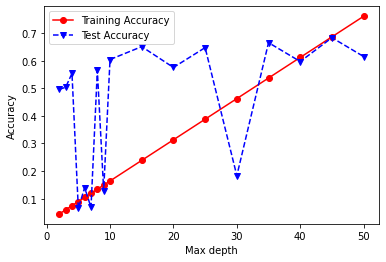

In [25]:
                        ################  Decision Tree Classifier #######################
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')



In [27]:
# to make prediction test 
Y_test = nanData['sub_region_1']
X_test = nanData.drop(['sub_region_1'],axis = 1)

predY = clf.predict(X_test)

nanData['sub_region_1'] = predY
nanData

,sub_region_1,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Kars,-88.0,-64.0,-71.0,-81.0,-81.0,38.0
1,Kars,-86.0,-57.0,-71.0,-77.0,-64.0,29.0
2,Kars,-85.0,-57.0,-66.0,-74.0,-50.0,21.0
3,Edirne,-33.0,18.0,4.0,-17.0,-20.0,7.0
4,Kırıkkale,-38.0,12.0,-8.0,-21.0,-22.0,10.0
...,...,...,...,...,...,...,...
273,Yozgat,10.0,63.0,34.0,22.0,-1.0,0.0
274,Yozgat,8.0,50.0,26.0,20.0,2.0,0.0
275,Yozgat,9.0,42.0,53.0,25.0,1.0,-1.0
276,Yozgat,16.0,61.0,39.0,30.0,-1.0,-2.0


Text(0, 0.5, 'Accuracy')

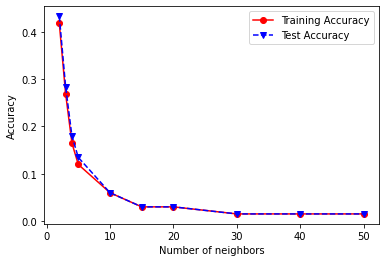

In [37]:
        ################### K-Nearest neighbor classifier ######################
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [2,3,4,5,10,15,20,30,40,50]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')



In [39]:
Y_test = nanData['sub_region_1']
X_test = nanData.drop(['sub_region_1'],axis = 1)

predY = clf.predict(X_test)

nanData['sub_region_1'] = predY
nanData

,sub_region_1,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Adana,-88.0,-64.0,-71.0,-81.0,-81.0,38.0
1,Adana,-86.0,-57.0,-71.0,-77.0,-64.0,29.0
2,Adana,-85.0,-57.0,-66.0,-74.0,-50.0,21.0
3,Adana,-33.0,18.0,4.0,-17.0,-20.0,7.0
4,Adana,-38.0,12.0,-8.0,-21.0,-22.0,10.0
...,...,...,...,...,...,...,...
273,Adana,10.0,63.0,34.0,22.0,-1.0,0.0
274,Adana,8.0,50.0,26.0,20.0,2.0,0.0
275,Adana,9.0,42.0,53.0,25.0,1.0,-1.0
276,Adana,16.0,61.0,39.0,30.0,-1.0,-2.0


Accuracy on test data is 0.97


Text(0, 0.5, 'Accuracy')

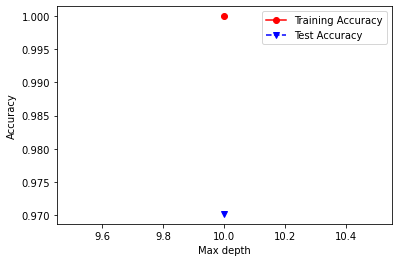

In [46]:
           ################ Ensemble Methods RandomForestClassifier ###################
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

numBaseClassifiers = 500
maxdepth = 10

trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

print('Accuracy on test data is %.2f' % (accuracy_score(Y_test, Y_predTest)))

plt.plot(maxdepth,trainAcc,'ro-',maxdepth,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')


In [48]:
Y_test = nanData['sub_region_1']
X_test = nanData.drop(['sub_region_1'],axis = 1)

predY = clf.predict(X_test)

nanData['sub_region_1'] = predY
nanData

,sub_region_1,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Kars,-88.0,-64.0,-71.0,-81.0,-81.0,38.0
1,Kars,-86.0,-57.0,-71.0,-77.0,-64.0,29.0
2,Kars,-85.0,-57.0,-66.0,-74.0,-50.0,21.0
3,Kocaeli,-33.0,18.0,4.0,-17.0,-20.0,7.0
4,Kırıkkale,-38.0,12.0,-8.0,-21.0,-22.0,10.0
...,...,...,...,...,...,...,...
273,Yozgat,10.0,63.0,34.0,22.0,-1.0,0.0
274,Gaziantep,8.0,50.0,26.0,20.0,2.0,0.0
275,Yozgat,9.0,42.0,53.0,25.0,1.0,-1.0
276,Yozgat,16.0,61.0,39.0,30.0,-1.0,-2.0
